# Bank_Churn_Prediction

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [204]:
df_raw=pd.read_csv('Churn_Modelling.csv')

In [205]:
df=df_raw.copy()

In [206]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Processing

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [208]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [209]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [210]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [211]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [212]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [213]:
Geography=pd.get_dummies(df['Geography'],drop_first=True)

In [214]:
df=pd.concat([df,Geography],axis=1)

In [215]:
df.drop('Geography',axis=1,inplace=True)

In [216]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [217]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [218]:
df['Gender']=df['Gender'].map({'Female':1, 'Male':0})

In [219]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany',
       'Spain'],
      dtype='object')

In [220]:
df=df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Germany',
       'Spain', 'Exited']]

In [221]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,0,0,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,1,42,8,159660.80,3,1,0,113931.57,0,0,1
3,699,1,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,1,0


## EDA

<AxesSubplot:xlabel='Exited', ylabel='count'>

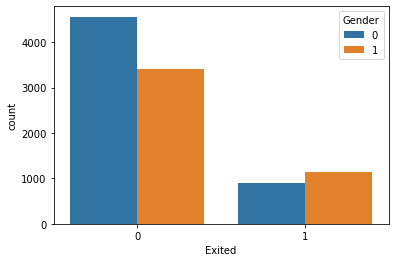

In [222]:
sns.countplot(df['Exited'],hue=df['Gender'])

In [223]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain',
       'Exited'],
      dtype='object')

In [224]:
lt=['Gender','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']

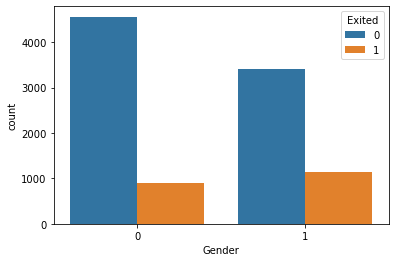

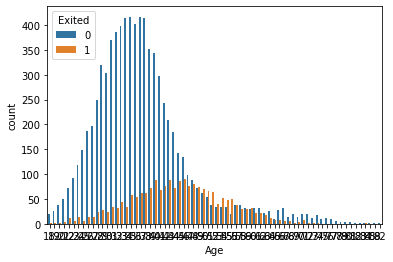

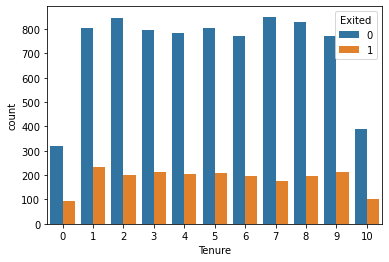

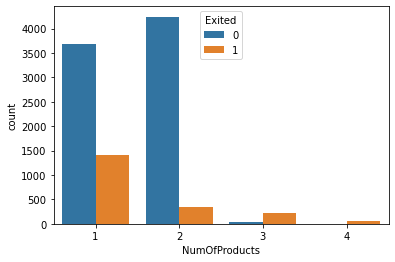

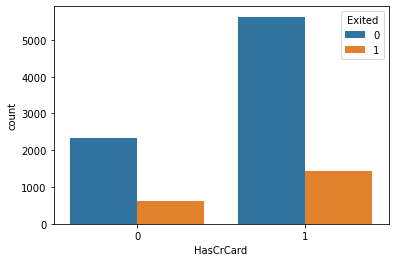

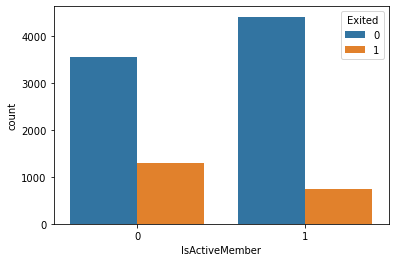

In [225]:
for i in lt:
    sns.countplot(df[i],hue=df['Exited'])
    plt.show()

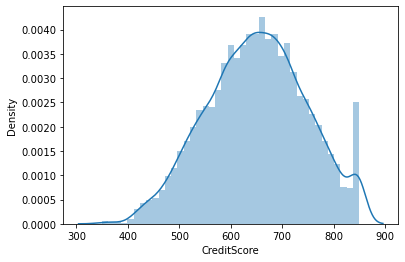

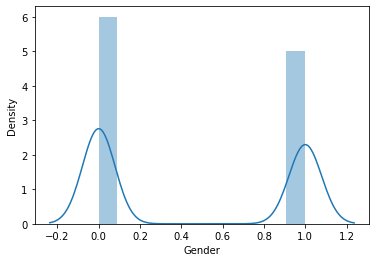

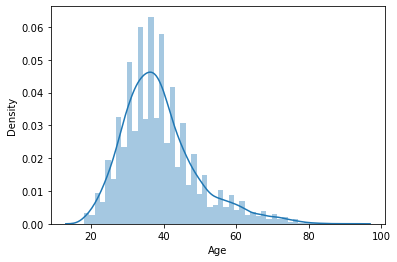

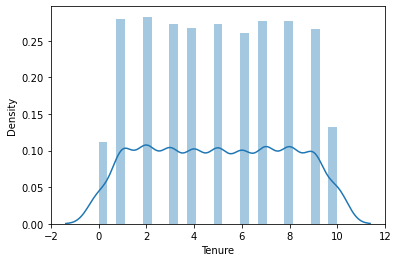

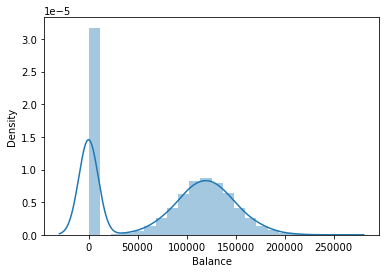

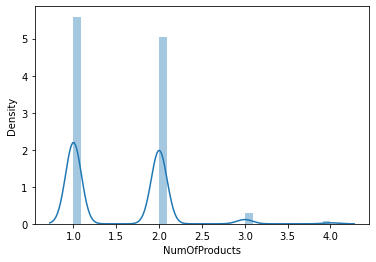

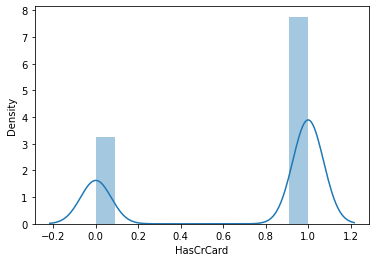

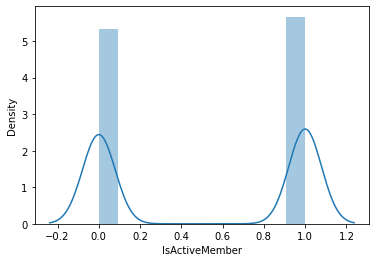

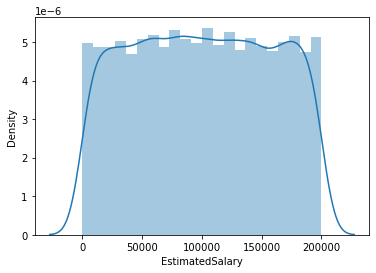

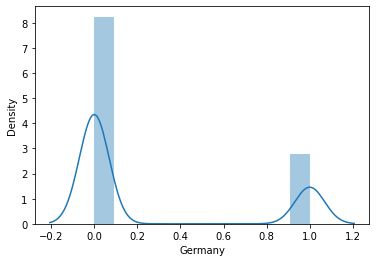

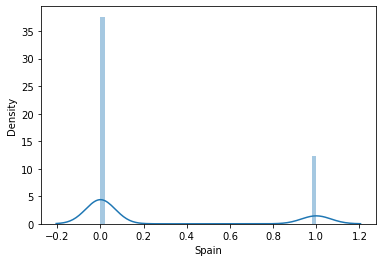

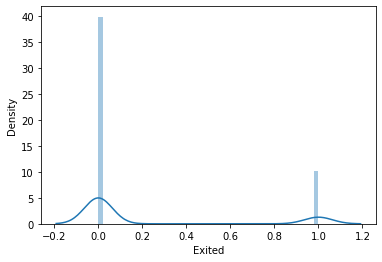

In [226]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

## Spliting the Data

In [227]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<AxesSubplot:xlabel='Exited', ylabel='count'>

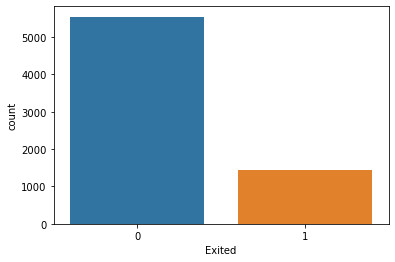

In [230]:
sns.countplot(y_train)

## Balencing the data

In [231]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek()

In [232]:
X_train,y_train=smt.fit_resample(X_train,y_train)

<AxesSubplot:xlabel='Exited', ylabel='count'>

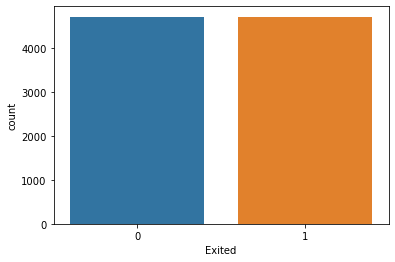

In [233]:
sns.countplot(y_train)

## Scaling

In [234]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [235]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Deep Learning Model

In [236]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [237]:
X.shape

(10000, 11)

## BaseLine

In [238]:
model=Sequential()

model.add(Dense(11,activation='relu'))

model.add(Dense(9,activation='relu'))

model.add(Dense(7,activation='relu'))

model.add(Dense(7,activation='relu'))

model.add(Dense(7,activation='relu'))

model.add(Dense(7,activation='relu'))

model.add(Dense(4,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [239]:
model.fit( x=X_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    verbose='auto',
    validation_data=(X_test,y_test))

Epoch 1/100
295/295 [==============================] - 3s 4ms/step - loss: 0.5966 - accuracy: 0.6942 - val_loss: 0.5581 - val_accuracy: 0.7180
Epoch 2/100
295/295 [==============================] - 1s 3ms/step - loss: 0.5201 - accuracy: 0.7437 - val_loss: 0.5390 - val_accuracy: 0.7323
Epoch 3/100
295/295 [==============================] - 1s 3ms/step - loss: 0.5025 - accuracy: 0.7501 - val_loss: 0.5708 - val_accuracy: 0.7127
Epoch 4/100
295/295 [==============================] - 1s 3ms/step - loss: 0.4950 - accuracy: 0.7554 - val_loss: 0.5686 - val_accuracy: 0.7153
Epoch 5/100
295/295 [==============================] - 1s 3ms/step - loss: 0.4875 - accuracy: 0.7554 - val_loss: 0.5000 - val_accuracy: 0.7633
Epoch 6/100
295/295 [==============================] - 1s 3ms/step - loss: 0.4829 - accuracy: 0.7576 - val_loss: 0.4984 - val_accuracy: 0.7690
Epoch 7/100
295/295 [==============================] - 1s 3ms/step - loss: 0.4760 - accuracy: 0.7644 - val_loss: 0.5354 - val_accuracy: 0.7453

In [240]:
loss=pd.DataFrame(model.history.history)

<AxesSubplot:>

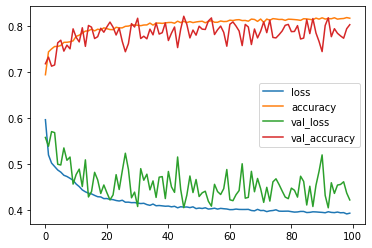

In [241]:
loss.plot()

In [242]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score

In [243]:
predictions = model.predict(X_test)

94/94 [==============================] - 0s 3ms/step


In [244]:
print(classification_report(y_test,predictions.round()))
print('\n')
print(confusion_matrix(y_test, predictions.round()))
print('\n')
print(accuracy_score(y_test, predictions.round()))
print('\n')
accuracy = accuracy_score(y_test, predictions.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2416
           1       0.49      0.62      0.55       584

    accuracy                           0.80      3000
   macro avg       0.70      0.74      0.71      3000
weighted avg       0.82      0.80      0.81      3000



[[2043  373]
 [ 219  365]]


0.8026666666666666


Accuracy: 80.27%
ROC AUC Score 0.7353062913907283


## Dropout

In [245]:
model=Sequential()

model.add(Dense(11,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [246]:
model.fit( x=X_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    verbose='auto',
    validation_data=(X_test,y_test))

Epoch 1/100
295/295 [==============================] - 3s 5ms/step - loss: 0.6897 - accuracy: 0.5154 - val_loss: 0.6606 - val_accuracy: 0.6807
Epoch 2/100
295/295 [==============================] - 1s 3ms/step - loss: 0.6612 - accuracy: 0.6297 - val_loss: 0.5938 - val_accuracy: 0.6957
Epoch 3/100
295/295 [==============================] - 1s 4ms/step - loss: 0.6409 - accuracy: 0.6613 - val_loss: 0.5636 - val_accuracy: 0.6980
Epoch 4/100
295/295 [==============================] - 1s 3ms/step - loss: 0.6268 - accuracy: 0.6813 - val_loss: 0.6056 - val_accuracy: 0.6547
Epoch 5/100
295/295 [==============================] - 1s 4ms/step - loss: 0.6138 - accuracy: 0.6930 - val_loss: 0.6589 - val_accuracy: 0.5940
Epoch 6/100
295/295 [==============================] - 1s 4ms/step - loss: 0.6044 - accuracy: 0.6952 - val_loss: 0.6604 - val_accuracy: 0.5773
Epoch 7/100
295/295 [==============================] - 1s 4ms/step - loss: 0.6069 - accuracy: 0.6932 - val_loss: 0.6179 - val_accuracy: 0.6433

In [247]:
predictions = model.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [248]:
print(classification_report(y_test,predictions.round()))
print('\n')
print(confusion_matrix(y_test, predictions.round()))
print('\n')
print(accuracy_score(y_test, predictions.round()))
print('\n')
accuracy = accuracy_score(y_test, predictions.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.96      0.51      0.67      2416
           1       0.31      0.90      0.46       584

    accuracy                           0.59      3000
   macro avg       0.63      0.71      0.56      3000
weighted avg       0.83      0.59      0.63      3000



[[1240 1176]
 [  58  526]]


0.5886666666666667


Accuracy: 58.87%
ROC AUC Score 0.7069649823097162


## Early Stop

In [249]:
model=Sequential()

model.add(Dense(11,activation='relu'))

model.add(Dense(9,activation='relu'))

model.add(Dense(7,activation='relu'))

model.add(Dense(7,activation='relu'))

model.add(Dense(7,activation='relu'))

model.add(Dense(7,activation='relu'))

model.add(Dense(4,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [250]:
early= EarlyStopping(monitor='val_loss',patience=20,mode='min',verbose=0)

In [251]:
model.fit( x=X_train,
    y=y_train,
    batch_size=32,
    epochs=100,
    verbose='auto',
    validation_data=(X_test,y_test),callbacks=early)

Epoch 1/100
295/295 [==============================] - 2s 4ms/step - loss: 0.6466 - accuracy: 0.6326 - val_loss: 0.5897 - val_accuracy: 0.6083
Epoch 2/100
295/295 [==============================] - 1s 3ms/step - loss: 0.5643 - accuracy: 0.7366 - val_loss: 0.5937 - val_accuracy: 0.6500
Epoch 3/100
295/295 [==============================] - 1s 3ms/step - loss: 0.5209 - accuracy: 0.7488 - val_loss: 0.5030 - val_accuracy: 0.7477
Epoch 4/100
295/295 [==============================] - 1s 3ms/step - loss: 0.5038 - accuracy: 0.7557 - val_loss: 0.5610 - val_accuracy: 0.7153
Epoch 5/100
295/295 [==============================] - 1s 3ms/step - loss: 0.4914 - accuracy: 0.7607 - val_loss: 0.5756 - val_accuracy: 0.7023
Epoch 6/100
295/295 [==============================] - 1s 4ms/step - loss: 0.4826 - accuracy: 0.7680 - val_loss: 0.4943 - val_accuracy: 0.7630
Epoch 7/100
295/295 [==============================] - 2s 5ms/step - loss: 0.4753 - accuracy: 0.7706 - val_loss: 0.5151 - val_accuracy: 0.7457

In [252]:
predictions = model.predict(X_test)

94/94 [==============================] - 0s 2ms/step


In [253]:
print(classification_report(y_test,predictions.round()))
print('\n')
print(confusion_matrix(y_test, predictions.round()))
print('\n')
print(accuracy_score(y_test, predictions.round()))
print('\n')
accuracy = accuracy_score(y_test, predictions.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      2416
           1       0.44      0.64      0.52       584

    accuracy                           0.77      3000
   macro avg       0.67      0.72      0.68      3000
weighted avg       0.81      0.77      0.78      3000



[[1937  479]
 [ 212  372]]


0.7696666666666667


Accuracy: 76.97%
ROC AUC Score 0.7193623559829447


In [254]:
from sklearn.neural_network import MLPClassifier

In [256]:
ml=MLPClassifier(hidden_layer_sizes=(1000,))
ml.fit(X_train,y_train)
predictions = ml.predict(X_test)
print(classification_report(y_test,predictions.round()))
print('\n')
print(confusion_matrix(y_test, predictions.round()))
print('\n')
print(accuracy_score(y_test, predictions.round()))
print('\n')
accuracy = accuracy_score(y_test, predictions.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print ('ROC AUC Score',roc_auc_score(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2416
           1       0.48      0.65      0.55       584

    accuracy                           0.79      3000
   macro avg       0.69      0.74      0.71      3000
weighted avg       0.82      0.79      0.81      3000



[[2003  413]
 [ 204  380]]


0.7943333333333333


Accuracy: 79.43%
ROC AUC Score 0.739870611448789
